In [4]:
from six.moves import cPickle
import os
import matplotlib.pyplot as plt
import numpy as np
import importlib
import utils as ut
from tqdm import tqdm
import mlp as mlp

In [5]:
K, d, n = 10, 3072, 10000
np.random.seed(42)
mu, sigma = 0, 0.01 
batch_start, batch_end= 0, 20

# Exercise 1: Data Preprocessing

In [6]:
def normalize_data(X, mean, std):
    X -= np.outer(mean_X, np.ones(X.shape[1]))
    X /= np.outer(std_X, np.ones(X.shape[1]))
    return X
    
importlib.reload(ut)
X_train, y_train, Y_train = ut.loadData('data_batch_1', clipping=True)
X_val, y_val, Y_val = ut.loadData('data_batch_2', clipping=True)
X_test, y_test, Y_test = ut.loadData('test_batch', clipping=True)

## normalize with mean and std of train set 
mean_X = np.mean(X_train, axis=1)
std_X = np.std(X_train, axis=1)

X_train = normalize_data(X_train, mean_X, std_X)
X_val = normalize_data(X_val, mean_X, std_X)
X_test = normalize_data(X_test, mean_X, std_X)
data = {"X_train": X_train, "y_train": y_train, "Y_train": Y_train, "X_val":X_val, "y_val": y_val, "Y_val": Y_val}

In [8]:
importlib.reload(ut)
X_train_whole, y_train_whole, Y_train_whole = ut.loadData('data_batch_1', clipping=True)

for i in range(2,6):
    X, y, Y = ut.loadData('data_batch_'+str(i), clipping=True)
    X_train_whole = np.concatenate((X, X_train_whole), axis=1)
    y_train_whole = np.concatenate((y, y_train_whole))
    Y_train_whole = np.concatenate((Y, Y_train_whole), axis=1)

n_val = 5000

X_val_small, y_val_small, Y_val_small = X_train_whole[:,-n_val:], y_train_whole[-n_val:], Y_train_whole[:,-n_val:]
X_train_whole, y_train_whole, Y_train_whole = X_train_whole[:,:-n_val], y_train_whole[:-n_val], Y_train_whole[:,:-n_val]

## normalize with mean and std of train set 
mean = np.mean(X_train_whole, axis=1)
std = np.std(X_train_whole, axis=1)

X_train_whole = normalize_data(X_train_whole, mean, std)
X_val_small = normalize_data(X_val_small, mean, std)

data_whole = {"X_train": X_train_whole, "y_train": y_train_whole, "Y_train": Y_train_whole, "X_val":X_val_small, "y_val": y_val_small, "Y_val": Y_val_small}

# Exercise 2: Compute the gradients for the network parameters

In [53]:
# X[0]

In [56]:
importlib.reload(mlp)
net = mlp.MLP()
bs = 20
X, Y = X_train[:, :bs], Y_train[:, :bs]
P = net.forward_pass(X)
P.shape

(10, 20)

In [49]:
# net.layers[0].b

In [57]:
importlib.reload(mlp)
net = mlp.MLP()
bs = 20
X, Y = X_train[:, :bs], Y_train[:, :bs]
c = net.compute_cost(X, Y)
c

(2.6225131126746075, 2.6225131126746075)

In [60]:
importlib.reload(mlp)
net = mlp.MLP()
bs = 1
X, Y = X_train[:, :bs], Y_train[:, :bs]
P = net.forward_pass(X)
net.compute_gradients(X, Y, P)
net.update_parameters()

In [11]:
net.layers[0].grad_b[3]

array([-0.13286412])

In [4]:
gn_ws, gn_bs = net.computeGradientsNum(X, Y, h=1e-5)

NameError: name 'net' is not defined

In [37]:
np.mean(abs(net.layers[0].grad_W - gn_Ws[0]))

0.013681409282569673

In [62]:
importlib.reload(mlp)
bs = 1
d = 20
net = mlp.MLP(dims=[d,50,10])
X, Y = X_train[:d, :bs], Y_train[:d, :bs]
P = net.forward_pass(X)
net.compute_gradients(X, Y, P)
net.compare_gradients(X, Y, h=1e-5, eps=1e-10)

([6.842173318640139e-09, 2.486442854455087e-10],
 [1.6587616452790045e-10, 5.641024873722951e-11],
 [4.899544291336755e-12, 4.539913783449534e-12],
 [5.9559019782023934e-12, 9.097046727024605e-12])

In [ ]:
importlib.reload(fu)
batch_size = [1, 32, 64, 100]
lambdas = [0, 0.1, 1]
np.random.seed(42)
for bs in tqdm(batch_size):
    for l in lambdas:
        W = np.random.normal(mu, sigma, (K,d))
        b = np.random.normal(mu, sigma, (K,1))
        P = ut.EvaluateClassifier(X_train[:, :bs], W, b)
        ga_w, ga_b = ut.ComputeGradients(X_train[:, :bs], Y_train[:, :bs], P, W, l)
        ga_b = ga_b.reshape(-1,1)
        gn_w, gn_b = fu.ComputeGradsNumSlow(X_train[:, :bs], Y_train[:, :bs], W, b, l, 1e-6)
        gn_b = gn_b.reshape(-1,1)
        diff_w = np.mean(abs(gn_w - ga_w))
        diff_b = np.mean(abs(gn_b - ga_b))
        rerr_w = np.mean(ut.compare_gradients(ga_w, gn_w, eps=1e-6))
        rerr_b = np.mean(ut.compare_gradients(ga_b, gn_b, eps=1e-6))
        print(f"{bs}-{l}-> \n diff_w {diff_w} \n diff_b  {diff_b} \n rerr_w {rerr_w} \n rerr_b {rerr_b}")

## Try to train the model with mini batch GD 

In [16]:
importlib.reload(mlp)
net = mlp.MLP()
GDparams = {"n_batch":100, "n_epochs":10, "eta":1e-3, "exp":"test_grad"}
net.minibatchGD(data, GDparams, verbose=True, backup=True)

100%|██████████| 10/10 [00:35<00:00,  3.55s/it]Epoch 9: train_acc=0.367 | val_acc=0.3372 | train_loss=1.824881359460654 | val_loss=1.8956240381676583 | train_cost=1.824881359460654 | val_cost=1.8956240381676583



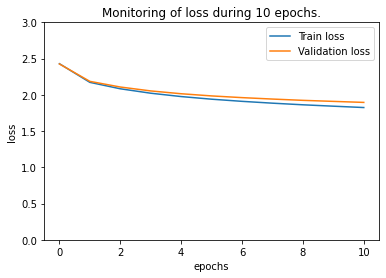

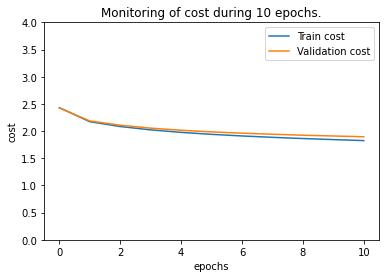

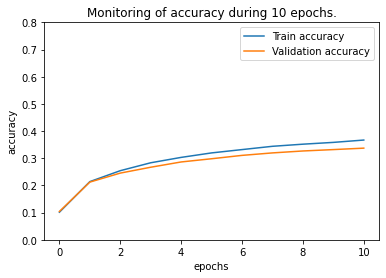

In [18]:
net.plot_metric(GDparams, metric="loss", cyclic=False)
net.plot_metric(GDparams, metric="cost", cyclic=False)
net.plot_metric(GDparams, metric="accuracy", cyclic=False)

# Exercise 3: Train your network with cyclical learning rules

In [31]:
importlib.reload(mlp)
net = mlp.MLP(lamda=.01)
GDparams = {"n_cycles":1, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":500, "freq":10, "exp":"rep3"}
net.cyclicLearning(data, GDparams, verbose=True, backup=True)

100%|██████████| 10/10 [00:44<00:00,  4.43s/it]


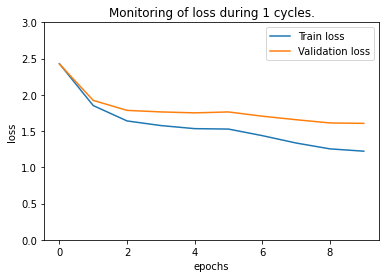

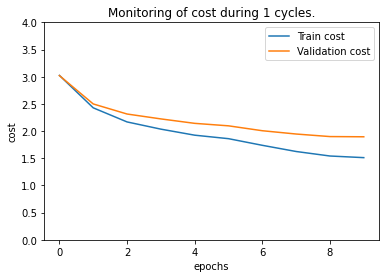

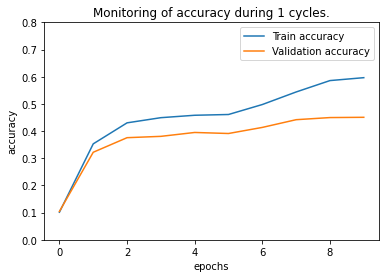

In [33]:
importlib.reload(mlp)
GDparams = {"n_cycles":1, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":500, "freq":10, "exp":"rep3"}
net = mlp.MLP.loadMLP(GDparams, lamda=0.01)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy")

In [27]:
net.computeAccuracy(X_test, y_test)

0.4622

# Exercise 4: Train your network for real

In [40]:
importlib.reload(mlp)
net2 = mlp.MLP(lamda=.01)
GDparams = {"n_batch":100, "n_cycles":3, "eta_min":1e-5, "eta_max":1e-1, "ns":800, "freq":8, "exp":"rep4"}
net2.cyclicLearning(data, GDparams, verbose=True, backup=True)

100%|██████████| 48/48 [01:44<00:00,  2.18s/it]


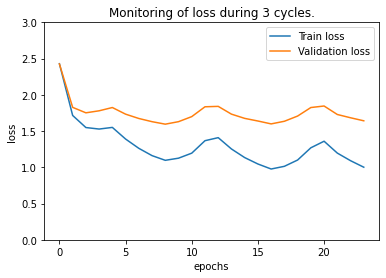

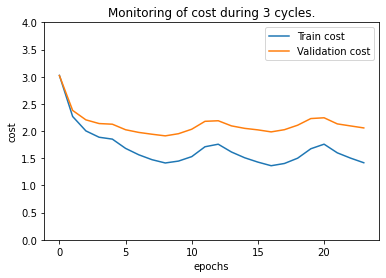

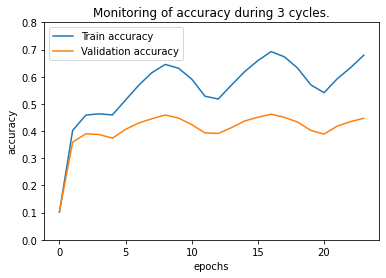

In [41]:
importlib.reload(mlp)
GDparams = {"n_batch":100, "n_cycles":3, "eta_min":1e-5, "eta_max":1e-1, "ns":800, "freq":8, "exp":"rep4"}
net2 = mlp.MLP.loadMLP(GDparams, lamda=0.01)
net2.plot_metric(GDparams, metric="loss")
net2.plot_metric(GDparams, metric="cost")
net2.plot_metric(GDparams, metric="accuracy")

In [42]:
net2.computeAccuracy(X_test, y_test)

0.4576

# Random Search

In [51]:
importlib.reload(mlp)
net2 = mlp.MLP(lamda=.01)
GDparams = {"n_batch":100, "n_cycles":1, "eta_min":1e-5, "eta_max":1e-1, "ns":5000, "freq":16, "exp":"rand_search"}
search = mlp.Search(l_min=-5, l_max=-1, n_lambda=[2,1], p1='n_batch', params1=[100], p2='eta_max', params2=[5e-1])
model = search.randomSearch(data_whole, GDparams)

 23%|██▎       | 5/22 [00:59<03:17, 11.60s/it]d:\insa\5if\KTH\P4\DL\Assignements\dl_labs\lab2\utils.py:12: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / np.sum(np.exp(x), axis=0)
d:\insa\5if\KTH\P4\DL\Assignements\dl_labs\lab2\utils.py:12: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / np.sum(np.exp(x), axis=0)
100%|██████████| 22/22 [03:29<00:00,  9.51s/it]


In [52]:
model.lamda

0.004189116844535839